In [2]:
#Importando librerias
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep

import seaborn as sns
sns.set(font_scale = 1.5, style = 'whitegrid')

#Directorio de trabajo
os.chdir(os.path.join(et.io.HOME, 'earth-analytics','data'))

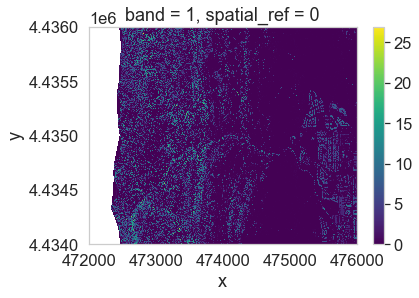

In [13]:
pre_lidar_chm_path = os.path.join('earthpy-downloads', 'colorado-flood',
                                 'spatial', 'outputs', 'pre-flood-chm.tif')
pre_lidar_chm = rxr.open_rasterio(pre_lidar_chm_path).squeeze()
pre_lidar_chm.plot()

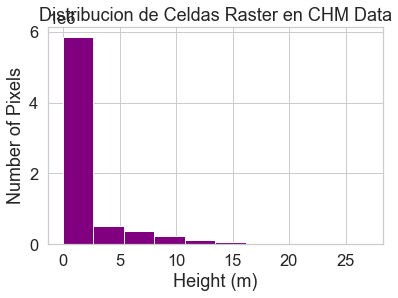

In [14]:
f, ax = plt.subplots()
pre_lidar_chm.plot.hist(color = 'purple')
ax.set(title='Distribucion de Celdas Raster en CHM Data', xlabel = 'Height (m)',
      ylabel='Number of Pixels')
plt.show()

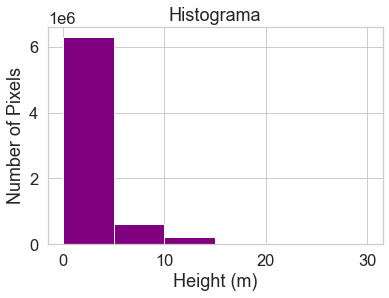

In [15]:
# Histograma presonalizado
f, ax = plt.subplots()
pre_lidar_chm.plot.hist(color="purple",
                        bins=[0, 5, 10, 15, 20, 30])
ax.set(title="Histograma",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

plt.show()

In [16]:
class_bins = [-np.inf, 2, 7, 12, np.inf]
class_bins

pre_lidar_chm_class = xr.apply_ufunc(np.digitize, pre_lidar_chm, 
                                    class_bins)
pre_lidar_chm_class_ma =pre_lidar_chm_class.where(pre_lidar_chm_class!=5)
pre_lidar_chm_class_ma

<xarray.DataArray (y: 2000, x: 4000)>
array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])
Coordinates:
    band         int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0

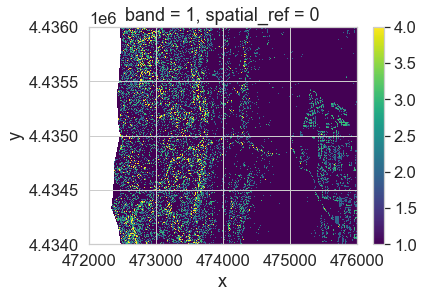

In [18]:
im = pre_lidar_chm_class_ma.plot.imshow()
ax.set_axis_off()

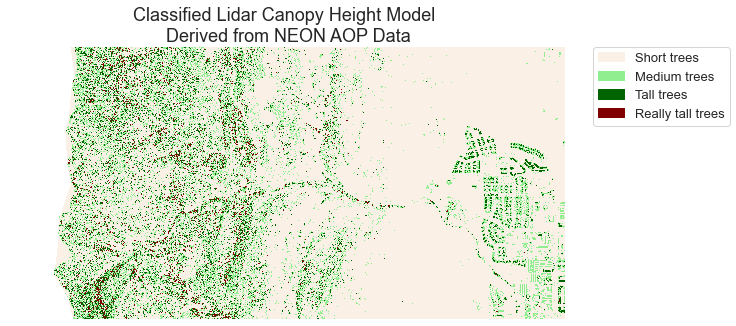

In [19]:
# Create a list of labels to use for your legend
height_class_labels = ["Short trees",
                       "Medium trees",
                       "Tall trees",
                       "Really tall trees"]

# Create a colormap from a list of colors
colors = ['linen',
          'lightgreen',
          'darkgreen',
          'maroon']

cmap = ListedColormap(colors)

class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
norm = BoundaryNorm(class_bins,
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
im = pre_lidar_chm_class_ma.plot.imshow(cmap=cmap,
                                        norm=norm,
                                        # Turn off colorbar
                                        add_colorbar=False)
# Add legend using earthpy
ep.draw_legend(im,
               titles=height_class_labels)
ax.set(title="Classified Lidar Canopy Height Model \n Derived from NEON AOP Data")
ax.set_axis_off()
plt.show()